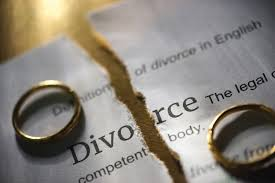

# Welcome to my kernel!
Divorce, also known as dissolution of marriage, is the process of terminating a marriage or marital union. Divorce usually entails the canceling or reorganizing of the legal duties and responsibilities of marriage, thus dissolving the bonds of matrimony between a married couple under the rule of law of the particular country or state.

Data taken from the [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set) repository.
A complete list of questions can be found below.

**Attribute Information:**
1.	When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend. 
2.	I know we can ignore our differences, even if things get hard sometimes. 
3.	When we need it, we can take our discussions with my wife from the beginning and correct it. 
4.	When I argue with my wife, it will eventually work for me to contact him. 
5.	The time I spent with my wife is special for us. 
6.	We don't have time at home as partners. 
7.	We are like two strangers who share the same environment at home rather than family. 
8.	I enjoy our holidays with my wife. 
9.	I enjoy traveling with my wife. 
10.	My wife and most of our goals are common. 
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other. 
12. My spouse and I have similar values in terms of personal freedom. 
13. My spouse and I have similar sense of entertainment. 
14. Most of our goals for people (children, friends, etc.) are the same. 
15. Our dreams with my spouse are similar and harmonious. 
16. We're compatible with my spouse about what love should be. 
17. We share the same views about being happy in our life with my spouse 
18. My spouse and I have similar ideas about how marriage should be 
19. My spouse and I have similar ideas about how roles should be in marriage 
20. My spouse and I have similar values in trust. 
21. I know exactly what my wife likes. 
22. I know how my spouse wants to be taken care of when she/he sick. 
23. I know my spouse's favorite food. 
24. I can tell you what kind of stress my spouse is facing in her/his life. 
25. I have knowledge of my spouse's inner world. 
26. I know my spouse's basic anxieties. 
27. I know what my spouse's current sources of stress are. 
28. I know my spouse's hopes and wishes. 
29. I know my spouse very well. 
30. I know my spouse's friends and their social relationships. 
31. I feel aggressive when I argue with my spouse. 
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ . 
33. I can use negative statements about my spouse's personality during our discussions. 
34. I can use offensive expressions during our discussions. 
35. I can insult my spouse during our discussions. 
36. I can be humiliating when we discussions. 
37. My discussion with my spouse is not calm. 
38. I hate my spouse's way of open a subject. 
39. Our discussions often occur suddenly. 
40. We're just starting a discussion before I know what's going on. 
41. When I talk to my spouse about something, my calm suddenly breaks. 
42. When I argue with my spouse, ı only go out and I don't say a word. 
43. I mostly stay silent to calm the environment a little bit. 
44. Sometimes I think it's good for me to leave home for a while. 
45. I'd rather stay silent than discuss with my spouse. 
46. Even if I'm right in the discussion, I stay silent to hurt my spouse. 
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger. 
48. I feel right in our discussions. 
49. I have nothing to do with what I've been accused of. 
50. I'm not actually the one who's guilty about what I'm accused of. 
51. I'm not the one who's wrong about problems at home. 
52. I wouldn't hesitate to tell my spouse about her/his inadequacy. 
53. When I discuss, I remind my spouse of her/his inadequacy. 
54. I'm not afraid to tell my spouse about her/his incompetence. 

## Download libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/divorce-predictors-data-set-csv/divorce-csv.csv', sep=',')
df.head()

In [ ]:
df.shape

In [ ]:
sns.countplot('Class', data=df)
plt.ylabel('распределение классов')
plt.show()

## Processing highly correlated traits
We use the correlation matrix to check for strongly correlated signs. If strongly correlated signs exist, then consider eliminating one of the correlated features

In [ ]:
#Create a correlation matrix
corr = df.corr().abs()

In [ ]:
#Select the upper triangle of the correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper.head(10)

In [ ]:
#Find the index of feature columns with a correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

###### 19. My wife and I have similar ideas about how roles should be in marriage  
###### 20. My wife and I have similar values in trust  
###### 36. I can be humiliating when we argue.

In [ ]:
hug_cor_data = df.drop(['Atr19', 'Atr20', 'Atr36'], axis=1)
hug_cor_data.shape

## Model creation

In [ ]:
X = hug_cor_data.iloc[:, :-1]
y = hug_cor_data.Class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))